# Notebook to visualize the daily infections in Berlin

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Print original data (cumulative) as dataframe:

In [2]:
cumulative_infections = pd.read_csv("corona-berlin-20200721.csv", 
                                    header=0, 
                                    names=["date", "infections", "deaths"], 
                                    parse_dates=['date'], 
                                    dayfirst=True)
cumulative_infections.head()

,date,infections,deaths
0,2020-03-01,1,NaN
1,2020-03-02,3,NaN
2,2020-03-03,6,NaN
3,2020-03-04,12,NaN
4,2020-03-06,19,NaN


## Transform the data to show daily infections:

In [3]:
daily_infections = cumulative_infections.drop(columns=["deaths"])
count = 0
for i in daily_infections.index: 
    cumulative = daily_infections['infections'][i]
    daily = cumulative - count
    count = cumulative
    daily_infections.loc[i, 'infections'] = daily
print(daily_infections)


          date  infections
0   2020-03-01           1
1   2020-03-02           2
2   2020-03-03           3
3   2020-03-04           6
4   2020-03-06           7
..         ...         ...
134 2020-07-16          26
135 2020-07-17          23
136 2020-07-18          25
137 2020-07-19           6
138 2020-07-20          23

[139 rows x 2 columns]


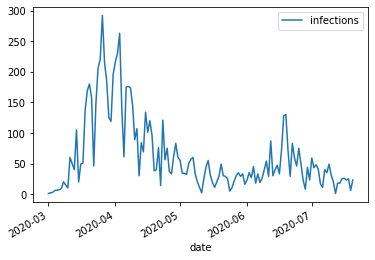

In [4]:
daily_infections.plot(x='date')

## Transform the data to show weekly infections:

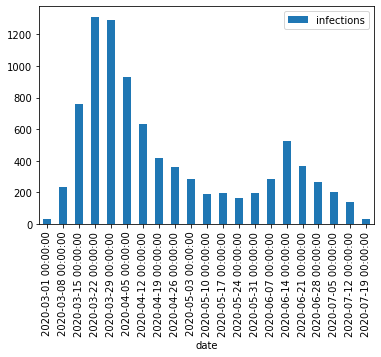

In [5]:
weekly_infections = daily_infections.resample(on='date', rule='7D').sum()
weekly_infections.plot(kind='bar')

In [6]:
display(daily_infections)
display(weekly_infections)

,date,infections
0,2020-03-01,1
1,2020-03-02,2
2,2020-03-03,3
3,2020-03-04,6
4,2020-03-06,7
...,...,...
134,2020-07-16,26
135,2020-07-17,23
136,2020-07-18,25
137,2020-07-19,6


,infections
date,
2020-03-01,28
2020-03-08,235
2020-03-15,762
2020-03-22,1312
2020-03-29,1289
2020-04-05,927
2020-04-12,634
2020-04-19,420
2020-04-26,363
